## load_digits
-----


### 반복 사용되는 모듈 추가

In [2]:
# 훈련/테스트 분류기, 리포트, pandas, np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
# 모델들
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

### 손글씨 숫자 이미지 가져오기 

In [21]:
from sklearn.datasets import load_digits
digit = load_digits()
digit_data = digit.data
digit_label = digit.target

### 데이터셋 행렬의 크기 확인 

In [22]:
digit.data.shape

(1797, 64)

### 각 행(이미지)는 64개의 0~16사이의 픽셀값을 갖고 있다.

In [125]:
digit_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

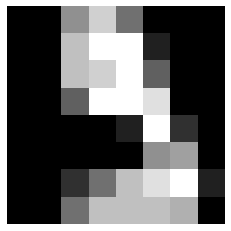

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit_data[29].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

### 각 컬럼은 이미지를 이루는 64개의 픽셀들이 차지하고 있다. 

In [16]:
digit.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

### 0~9사이의 숫자이미지들을 분류해야한다.

In [15]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터셋 특성확인

In [130]:
digit['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

### 데이터셋의 특성 ([scikit_learn 도큐먼트 참조](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset))

1. 10개 클래스로 이루어진 총 1797개 데이터 중, 각클래스 별로 최대 180개(10%수준)의 이미지가 저장되어있다.      
   **즉, 클래스별 데이터 개수에 유의미한 차이는 없을 것이다.**   
   **또한 별도의 라벨 지정 역시 하지 않는다**
   
<br>

2. 원본 연구에서는 총 43명에게서 수집된 손글씨 데이터중 30개를 트레이닝 셋으로 13개를 테스트셋으로 구성했다고 한다.   
   **test_size 설정시 이 비율((13/43)*100 = 30%)을 사용해 테스트셋을 구성하자**

<br>

3. 흑백이미지 파일이므로 RGB색상별 비교는 불필요하고,   
   **전체 픽셀(컬럼)이 다 모여야 하나의 이미지를 구성**하기 때문에 별도의 feature 선정은 불필요할 것이다.

<br>  

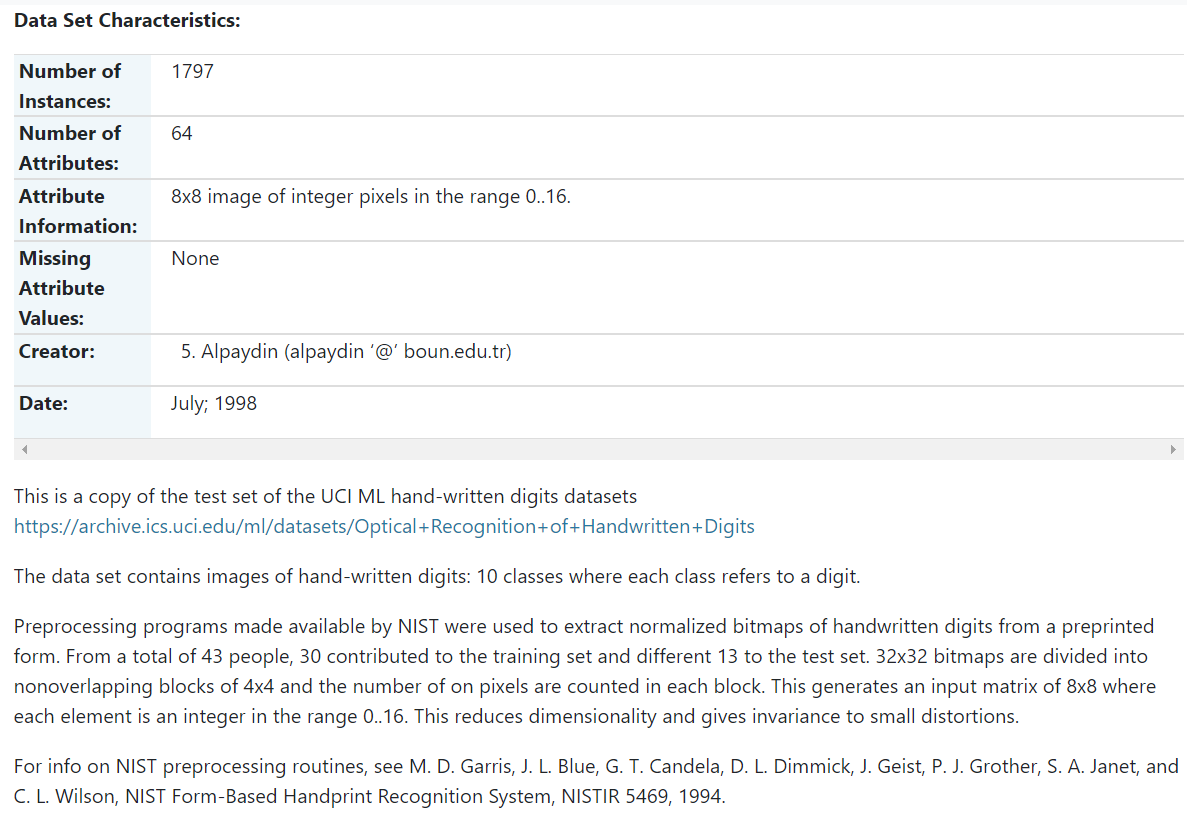

### 데이터 프레임으로 라벨컬럼 추가

In [26]:
digit_pd = pd.DataFrame(data= digit_data, columns=digit.feature_names)
digit_pd['label'] = digit_label
digit_pd

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### 라벨의 분포확인

In [158]:
# 0~99번째 출력
print(list(digit_pd['label'])[:99])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3]


**라벨이 기본적으로 불규칙적인 분포를 보이고 있다.**


### 훈련 데이터와 테스트 데이터 구분

In [156]:
# 데이터 셋에서 확인한 테스트 데이터의 비율로 test_size 설정, 라벨의 배열이 불규칙하므로 random_state 미설정
X_train, X_test, y_train, y_test = train_test_split(digit_data, digit_label, test_size= 0.3)

### 의사결정트리, 랜덤포레스트 분류기, SVM, SGD, 로지스틱 선형회귀 순으로 모델 테스트

In [157]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.70      0.80      0.75        55
           2       0.83      0.78      0.80        58
           3       0.75      0.80      0.77        51
           4       0.89      0.93      0.91        55
           5       0.82      0.95      0.88        44
           6       0.96      0.94      0.95        52
           7       0.83      0.85      0.84        47
           8       0.73      0.64      0.68        67
           9       0.77      0.67      0.72        55

    accuracy                           0.82       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.83      0.82      0.82       540



In [159]:
# RandomForestClassifier
random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.93      1.00      0.96        55
           2       0.98      1.00      0.99        58
           3       0.98      1.00      0.99        51
           4       0.96      1.00      0.98        55
           5       0.98      1.00      0.99        44
           6       1.00      1.00      1.00        52
           7       0.98      0.96      0.97        47
           8       0.98      0.93      0.95        67
           9       0.98      0.93      0.95        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [160]:
# svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        58
           3       0.98      0.98      0.98        51
           4       1.00      1.00      1.00        55
           5       0.98      1.00      0.99        44
           6       1.00      1.00      1.00        52
           7       0.98      0.98      0.98        47
           8       0.98      0.97      0.98        67
           9       0.98      0.95      0.96        55

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [161]:
# SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.91      0.95      0.93        55
           2       0.98      1.00      0.99        58
           3       1.00      0.86      0.93        51
           4       0.98      0.95      0.96        55
           5       0.91      0.98      0.95        44
           6       0.95      1.00      0.97        52
           7       0.98      0.91      0.95        47
           8       0.92      0.84      0.88        67
           9       0.80      0.93      0.86        55

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



In [163]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.90      0.96      0.93        55
           2       0.98      1.00      0.99        58
           3       0.98      0.98      0.98        51
           4       0.98      0.91      0.94        55
           5       0.91      0.98      0.95        44
           6       0.98      0.98      0.98        52
           7       0.96      0.96      0.96        47
           8       0.95      0.94      0.95        67
           9       1.00      0.95      0.97        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 

## load_wine
-----

In [141]:
from sklearn.datasets import load_wine
wines = load_wine()
wines_data = wines.data
wines_label = wines.target

### wines_data ndarray객체의 크기와 1행 확인

In [166]:
wines_data.shape

(178, 13)

In [165]:
wines_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

### 와인의 화학적 분석항목들이 각 컬럼에 할당되어 있다.

In [32]:
print(wines.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 타겟은 와인의 등급

In [34]:
print(wines.target_names)

['class_0' 'class_1' 'class_2']


### 데이터셋 특성 확인

In [35]:
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 데이터셋의 특성

1. 전체 178개 데이터가 3개의 클래스에 50개씩 할당 되어있고, 그 중 28개의 데이터가 테스트 데이터이다.   
   **학습 데이터가 특정 클래스에 편중되어 있지 않다.**   
   **test_size를 (28/178)*100=15%**로 설정하자.
   
<br>
 
2. 각 항목별로 **표준편차의 크기 차이**가 심하다.   
   **최초 수행시 매우 낮은 정확도(40%대)를 보인 원인**으로 추측됨   
   현재 결과는 **표준편차가 0.57 ~ 0.8 사이에 있는 컬럼만을 feature로 지정**한 2회차 이후의 결과  
   
   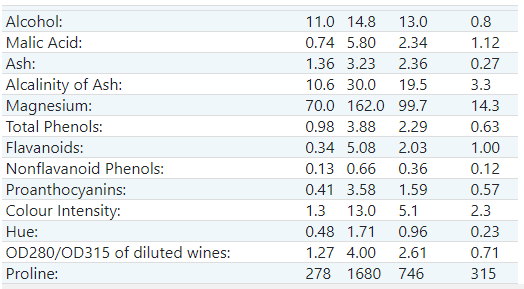
   
**Alcohol,total_phenols, proanthocyanins, od280/od315_of_diluted_wines**가 해당된다.
<br>   
   
### 기존 데이터의 라벨분포 확인

In [140]:
wines_pd = pd.DataFrame(data= wines_data, columns=wines.feature_names)
wines_pd['label'] = wines_label
wines_pd

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [168]:
print(list(wines_pd['label']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


**라벨이 순차적으로 정렬되어 있다**

### 표준편차 0.57 ~ 0.8 사이의 feature 지정    

In [87]:
new_data = np.array(wines_pd.loc[:,['alcohol','total_phenols','proanthocyanins', 'od280/od315_of_diluted_wines']])

### 훈련데이터와 테스트 데이터 구분

In [169]:
# 데이터 셋에서 확인한 테스트 데이터의 비율로 test_size 설정하고 random_state로 label 순서 섞기
X_train, X_test, y_train, y_test = train_test_split(new_data, wines_label, test_size=0.15, random_state=15)

### 의사결정트리, 랜덤포레스트 분류기, SVM, SGD, 로지스틱 선형회귀 순으로 모델 테스트

In [152]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.89      0.76         9
           2       1.00      0.80      0.89        10

    accuracy                           0.81        27
   macro avg       0.84      0.81      0.82        27
weighted avg       0.85      0.81      0.82        27



In [19]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [153]:
# RandomForestClassifier
random_forest = RandomForestClassifier(random_state=30)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.80      0.89      0.84         9
           2       1.00      0.80      0.89        10

    accuracy                           0.89        27
   macro avg       0.90      0.90      0.89        27
weighted avg       0.90      0.89      0.89        27



In [154]:
# svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.78      0.78      0.78         9
           2       0.90      0.90      0.90        10

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27



In [155]:
# SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.33      0.50         9
           2       0.83      1.00      0.91        10

    accuracy                           0.78        27
   macro avg       0.83      0.78      0.74        27
weighted avg       0.84      0.78      0.74        27



In [93]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.71      0.83      0.77        12
           2       0.90      0.75      0.82        12

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.83        36
weighted avg       0.84      0.83      0.83        36



C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## load_breast_cancer
-----

In [3]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [4]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터셋의 특성 확인 ([도큐먼트 참조](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset))

In [6]:
breast_cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

### 데이터셋의 특성

1. 총 569개의 데이터가 2개의 클래스에(0: 212, 1: 357)로 나뉘어 있다. 클래스 1의 데이터 수가 0 클래스의 1.5배 이상.   
   **지금은 두 개 클래스의 비율을 조정해주지 않았지만, 조정해주는게 맞는 걸까?...** 
   
<br>

2. 각 컬럼의 표준편차 크기 차이가 매우 큼, 또한 동일한 평가항목에 대해서 mean, standard error, worst 로 3회씩 측정되어 있다.   
   mean, standard error, worst 모두 **표준편차가 0 ~ 0.6에 걸친 컬럼을 feature로 지정**

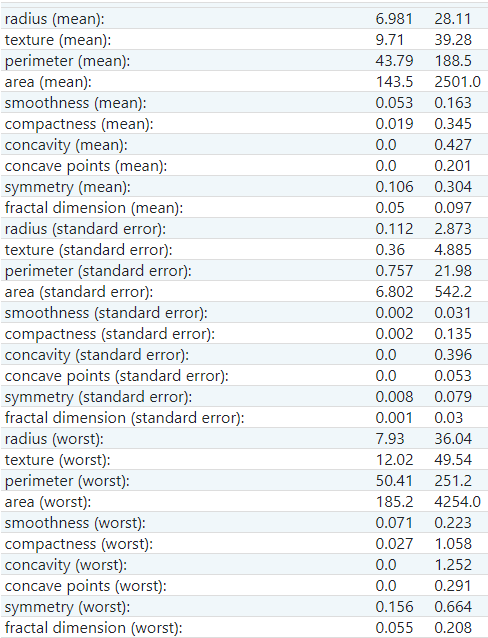

**smoothness, compactness, mean concavity, concave points, symmetry, fractal dimension가 해당된다.**


### 데이터 프레임으로 라벨컬럼 생성 

In [7]:
breast_cancer_pd = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_pd['label'] = breast_cancer_label
breast_cancer_pd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
from collections import Counter
Counter(breast_cancer_pd['label'])

Counter({0: 212, 1: 357})

In [9]:
list(breast_cancer_pd['label'])[:50]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1]

**라벨은 무작위로 배치되어 있다.**

<br>

### 표준편차 0 ~ 0.6 이내의 컬럼 feature로 지정

In [11]:
new_cancer_data = np.array(breast_cancer_pd.loc[:,['mean smoothness', 'mean compactness', 'mean concavity',
                                            'mean concave points', 'mean symmetry', 'mean fractal dimension',
                                            'smoothness error', 'compactness error', 'concavity error',
                                            'concave points error', 'symmetry error', 'fractal dimension error',
                                            'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points',
                                            'worst symmetry', 'worst fractal dimension' ]])

### 훈련데이터와 테스트데이터 구분

In [12]:
# 데이터 셋에서 확인한 테스트 데이터의 비율로 test_size 설정, 라벨이 무작위로 구성되어있으므로 random_state 미적용
X_train, X_test, y_train, y_test = train_test_split(new_cancer_data, breast_cancer_label, test_size=0.2)

### 의사결정트리, 랜덤포레스트 분류기, SVM, SGD, 로지스틱 선형회귀 순으로 모델 테스트

In [13]:
# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [14]:
# RandomForestClassifier
random_forest = RandomForestClassifier(random_state=30)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [18]:
# svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [16]:
# SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        43
           1       0.95      0.87      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [17]:
# LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        43
           1       0.85      0.96      0.90        71

    accuracy                           0.87       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.87      0.86       114

